In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [506]:
data = pd.read_csv('co2.csv')
data = data.dropna()
print(data.head())


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [507]:
data = data.select_dtypes(include=['number'])
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [508]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix =  numeric_data.corr()['CO2 Emissions(g/km)']
print(correlation_matrix)

Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Comb (mpg)        -0.907426
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64


In [509]:
# drop_columns = ['Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']
# data = data.drop(columns=drop_columns)


In [510]:
features = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

In [511]:
data = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

In [512]:
print(data.head())

   Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0             2.0          4                               8.5   
1             2.4          4                               9.6   
2             1.5          4                               5.9   
3             3.5          6                              11.1   
4             3.5          6                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244  


In [513]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))
mean = scaler.mean_
print(mean)
print("-----------")
scale = scaler.fit_transform(data)
print(scale)

StandardScaler()
[  3.1600677    5.61503047  10.97507109 250.58469871]
-----------
[[-0.85672099 -0.88340757 -0.85574185 -0.93293275]
 [-0.5613172  -0.88340757 -0.47542306 -0.50564599]
 [-1.22597573 -0.88340757 -1.75467716 -1.95842095]
 ...
 [-0.85672099 -0.88340757 -0.23340202 -0.18090806]
 [-0.85672099 -0.88340757 -0.37169976 -0.31763982]
 [-0.85672099 -0.88340757 -0.09510428 -0.0441763 ]]


In [514]:
print(scale)

[[-0.85672099 -0.88340757 -0.85574185 -0.93293275]
 [-0.5613172  -0.88340757 -0.47542306 -0.50564599]
 [-1.22597573 -0.88340757 -1.75467716 -1.95842095]
 ...
 [-0.85672099 -0.88340757 -0.23340202 -0.18090806]
 [-0.85672099 -0.88340757 -0.37169976 -0.31763982]
 [-0.85672099 -0.88340757 -0.09510428 -0.0441763 ]]


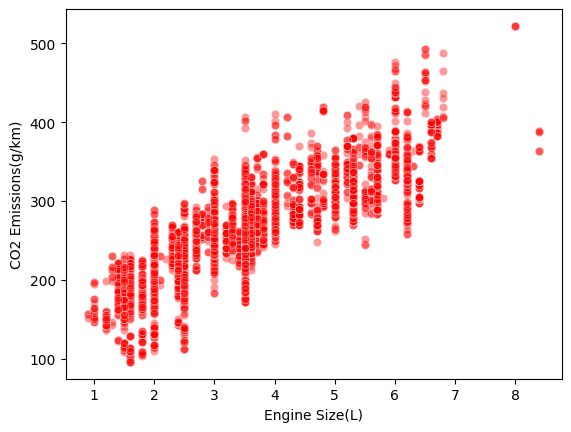

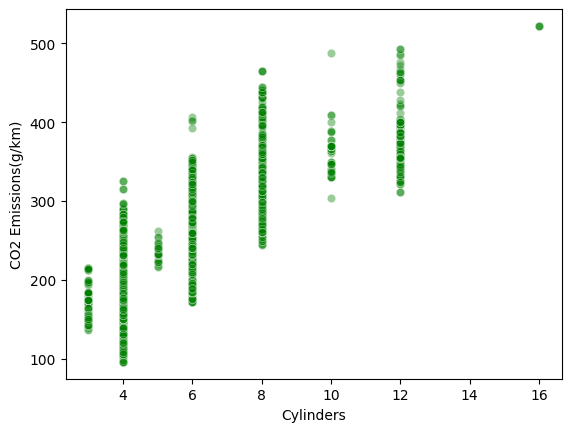

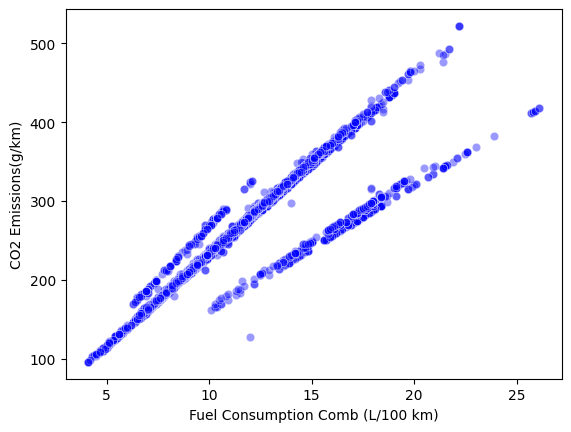

In [515]:
sns.scatterplot(x=data['Engine Size(L)'], y=data['CO2 Emissions(g/km)'], alpha=0.4, color='red')
plt.show()
sns.scatterplot(x=data['Cylinders'], y=data['CO2 Emissions(g/km)'], alpha=0.4, color='green')
plt.show()
sns.scatterplot(x=data['Fuel Consumption Comb (L/100 km)'], y=data['CO2 Emissions(g/km)'], alpha=0.4, color='blue')
plt.show()

In [516]:
# features = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
# target = data['CO2 Emissions(g/km)']

# X=features
# y=target

X = scale[:, :-1]  # Assuming last column is the target
y = scale[:, -1]

 Gradient Descent Algorithm:

a. Initialization: Start with initial values for m and c. These can be zeros or any random values.

b. Compute the Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient is a vector of the partial derivatives of J(m,c) with respect to m and c

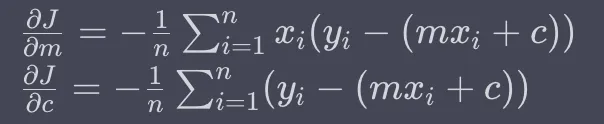

c. Update Parameters: Adjust m and c in the opposite direction of the gradient by a certain step size, known as the learning rate (α): ​

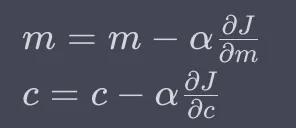


d. Iteration: Repeat steps b and c until the gradient is close to zero, the cost function converges to a minimum value, or a set number of iterations is reached.

____________________________________________________

m is weights, c is bias from here on.

In [517]:
class LinearRegression():
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        #gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            #compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            #update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    

In [518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [519]:
scaler = StandardScaler().fit(X_train)
print(X_train)

[[-0.11821152  0.21057498 -0.37169976]
 [ 0.62029796  0.21057498  0.59638442]
 [-0.11821152  0.21057498  0.25064007]
 ...
 [ 0.25104322  0.21057498 -0.19882758]
 [-0.48746625 -0.88340757 -0.82116741]
 [ 0.62029796  1.30455753  0.31978894]]


In [520]:
model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


In [521]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.35180670014695253


In [522]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8768206322589582


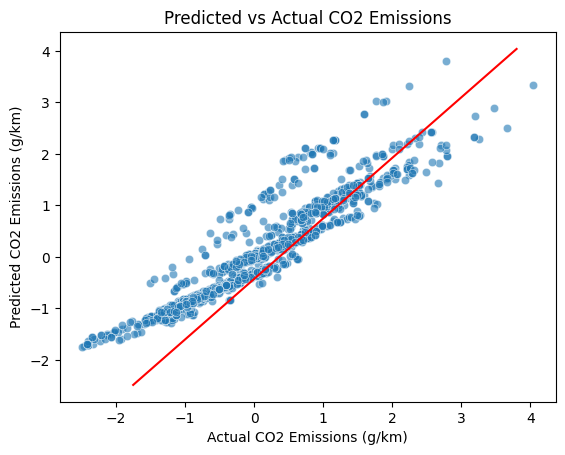

In [523]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_pred.min(), y_pred.max()], [y_test.min(), y_test.max()], 'red') 
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Predicted vs Actual CO2 Emissions")
plt.show()

In [525]:
print(y_test)

[ 0.04128105  1.59660483  1.22059249 ... -1.13803039 -0.26636541
 -0.98420716]
